In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
creditData = pd.DataFrame(pd.read_csv("C:\\Users\\PC\\Desktop\\Python\\Dataset\\LoanApplicantData.csv"))
creditData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
creditData.shape

(614, 13)

In [4]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
creditData.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
creditData.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
creditData['Gender'].fillna(creditData['Gender'].mode()[0],inplace=True)
creditData['Dependents'].fillna(creditData['Dependents'].mode()[0],inplace=True)
creditData['Self_Employed'].fillna(creditData['Self_Employed'].mode()[0],inplace=True)

creditData.LoanAmount=creditData.LoanAmount.fillna(creditData.LoanAmount.mean())

creditData['Loan_Amount_Term'].fillna(creditData['Loan_Amount_Term'].mode()[0],inplace=True)
creditData['Credit_History'].fillna(creditData['Credit_History'].mode()[0],inplace=True)


C:\Users\PC\AppData\Local\Temp\ipykernel_10480\1384455953.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  creditData['Gender'].fillna(creditData['Gender'].mode()[0],inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_10480\1384455953.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [8]:
creditData.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
creditData.duplicated().any()

False

In [10]:
creditData.Loan_Status=creditData.Loan_Status.map({'Y':1,'N':0})
creditData.Gender=creditData.Gender.map({'Male':1,'Female':0})
creditData.Married=creditData.Married.map({'Yes':1,'No':0})
creditData.Education=creditData.Education.map({'Graduate':1,'Not Graduate':0})
creditData.Self_Employed=creditData.Self_Employed.map({'Yes':1,'No':0})
creditData.Dependents=creditData.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
creditData.Property_Area=creditData.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [11]:
creditData.Married.fillna(np.random.randint(0,2),inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_10480\1397199565.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  creditData.Married.fillna(np.random.randint(0,2),inplace=True)


In [12]:
creditData.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
creditData.drop(['Loan_ID'], axis=1, inplace=True)

In [14]:
creditData

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0.0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1.0,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1.0,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1.0,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0.0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0.0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1.0,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1.0,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1.0,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


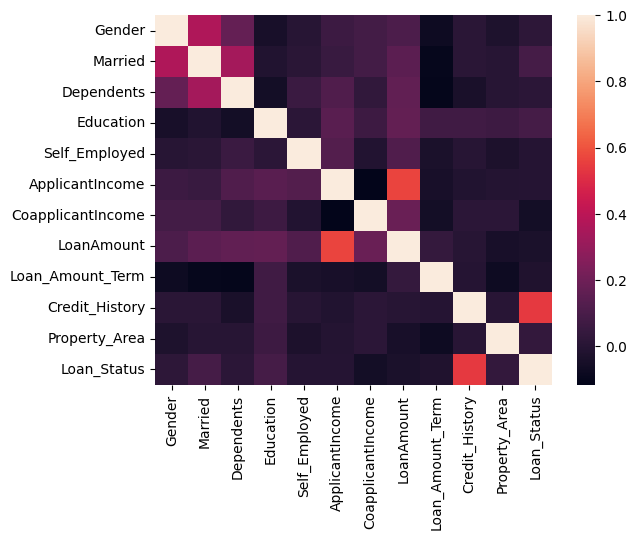

<Figure size 1200x800 with 0 Axes>

In [15]:
sns.heatmap(creditData.corr())
plt.figure(figsize=(12, 8))
plt.show()

In [16]:
feature_cols = ['Gender'	,'Married'	,'Dependents'	,'Education'	,'Self_Employed'	,
                'ApplicantIncome'	,'CoapplicantIncome'	,'LoanAmount'	,'Loan_Amount_Term'	,
                'Credit_History'	,'Property_Area']
X = creditData[feature_cols]
y = creditData.Loan_Status

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                    test_size = 0.3, random_state = 100)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=100, max_leaf_nodes=3)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7783783783783784
Confusion Matrix:
[[ 25  38]
 [  3 119]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.40      0.55        63
           1       0.76      0.98      0.85       122

    accuracy                           0.78       185
   macro avg       0.83      0.69      0.70       185
weighted avg       0.80      0.78      0.75       185



In [20]:
predicted_Status = dt_classifier.predict([[1	,0.0	,0	,1	,0	,5849	,0.0	,146.412162	,360.0	,1.0	,2]])
print(predicted_Status)

[1]


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [21]:
predicted_Status = dt_classifier.predict([[0	,0.0	,0	,1	,1	,4583	,0.0	,133.000000	,360.0	,0.0	,1]])
print(predicted_Status)

[0]


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
